In [1]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Read the uploaded CSV file using pandas
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

In [2]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/09/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,26/03/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,29/06/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,11/09/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,14/12/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179916,23/05/2023,15:17,BROOKLYN,11215.0,40.669197,-73.992930,"(40.669197, -73.99293)",NaN,NaN,534 3 AVENUE,...,Unspecified,NaN,NaN,NaN,4631865,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
179917,22/05/2023,21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY,...,Driver Inattention/Distraction,NaN,NaN,NaN,4632025,Sedan,Sedan,NaN,NaN,NaN
179918,23/05/2023,18:04,NaN,NaN,40.643517,-74.018740,"(40.643517, -74.01874)",GOWANUS EXPY (BQE),NaN,NaN,...,Unspecified,NaN,NaN,NaN,4631515,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
179919,19/11/2023,1:21,BROOKLYN,11216.0,40.670124,-73.955280,"(40.670124, -73.95528)",EASTERN PARKWAY,BEDFORD AVENUE,NaN,...,NaN,NaN,NaN,NaN,4680998,Pick-up Truck,Sedan,NaN,NaN,NaN


In [3]:
print(df.dtypes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [4]:
# Step 1: Convert 'CRASH DATE' and 'CRASH TIME' to a single datetime column
df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'], errors='coerce')

# Optional: Drop the original 'CRASH DATE' and 'CRASH TIME' columns
df.drop(['CRASH DATE', 'CRASH TIME'], axis=1, inplace=True)

# Step 2: Check and fill missing values
# Example: Fill missing BOROUGH with 'UNKNOWN'
df['BOROUGH'] = df['BOROUGH'].fillna('UNKNOWN')

# You can also inspect all missing values if needed:
# print(df.isnull().sum().sort_values(ascending=False))

# Step 3: Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [5]:
df

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_DATETIME
0,UNKNOWN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0,...,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021-11-09 02:39:00
1,UNKNOWN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0,...,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,NaT
2,UNKNOWN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0,...,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,NaT
3,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0,...,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,2021-11-09 09:35:00
4,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0,...,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179916,BROOKLYN,11215.0,40.669197,-73.992930,"(40.669197, -73.99293)",NaN,NaN,534 3 AVENUE,1.0,0,...,NaN,NaN,NaN,4631865,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,NaT
179917,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY,0.0,0,...,NaN,NaN,NaN,4632025,Sedan,Sedan,NaN,NaN,NaN,NaT
179918,UNKNOWN,NaN,40.643517,-74.018740,"(40.643517, -74.01874)",GOWANUS EXPY (BQE),NaN,NaN,3.0,0,...,NaN,NaN,NaN,4631515,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,NaT
179919,BROOKLYN,11216.0,40.670124,-73.955280,"(40.670124, -73.95528)",EASTERN PARKWAY,BEDFORD AVENUE,NaN,2.0,0,...,NaN,NaN,NaN,4680998,Pick-up Truck,Sedan,NaN,NaN,NaN,NaT


In [6]:
columns_to_drop = [
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [7]:
df.columns

Index(['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'CRASH_DATETIME'],
      dtype='object')

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CRASH_DATETIME
0,UNKNOWN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0,...,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,2021-11-09 02:39:00
1,UNKNOWN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0,...,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,NaT
2,UNKNOWN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0,...,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,NaT
3,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0,...,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,2021-11-09 09:35:00
4,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0,...,0,0,0,0,NaN,NaN,4486609,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179916,BROOKLYN,11215.0,40.669197,-73.992930,"(40.669197, -73.99293)",NaN,NaN,534 3 AVENUE,1.0,0,...,0,0,1,0,Failure to Yield Right-of-Way,Unspecified,4631865,Station Wagon/Sport Utility Vehicle,Sedan,NaT
179917,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY,0.0,0,...,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4632025,Sedan,Sedan,NaT
179918,UNKNOWN,NaN,40.643517,-74.018740,"(40.643517, -74.01874)",GOWANUS EXPY (BQE),NaN,NaN,3.0,0,...,0,0,3,0,Following Too Closely,Unspecified,4631515,Sedan,Tractor Truck Diesel,NaT
179919,BROOKLYN,11216.0,40.670124,-73.955280,"(40.670124, -73.95528)",EASTERN PARKWAY,BEDFORD AVENUE,NaN,2.0,0,...,0,0,2,0,Unspecified,NaN,4680998,Pick-up Truck,Sedan,NaT


In [10]:
# Display the first row (record) with all columns
df.iloc[0]

,0
BOROUGH,UNKNOWN
ZIP CODE,NaN
LATITUDE,NaN
LONGITUDE,NaN
LOCATION,NaN
ON STREET NAME,WHITESTONE EXPRESSWAY
CROSS STREET NAME,20 AVENUE
OFF STREET NAME,NaN
NUMBER OF PERSONS INJURED,2.0
NUMBER OF PERSONS KILLED,0


In [11]:
df['BOROUGH'].value_counts()

,count
BOROUGH,
UNKNOWN,61761
BROOKLYN,40823
QUEENS,31815
BRONX,21681
MANHATTAN,19365
STATEN ISLAND,4476


In [12]:
injuries_by_borough = df.groupby('BOROUGH')[[
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED'
]].sum()

In [13]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

,count
CONTRIBUTING FACTOR VEHICLE 1,
Unspecified,44464
Driver Inattention/Distraction,43651
Failure to Yield Right-of-Way,12280
Following Too Closely,11876
Passing or Lane Usage Improper,8105
Passing Too Closely,6946
Unsafe Speed,6286
Backing Unsafely,5704
Traffic Control Disregarded,5068


In [14]:
# Crashes by hour of the day
df['HOUR'] = df['CRASH_DATETIME'].dt.hour
df['HOUR'].value_counts().sort_index()

,count
HOUR,
0.0,3220
1.0,1721
2.0,1377
3.0,1244
4.0,1299
5.0,1346
6.0,1917
7.0,2352
8.0,3559


In [15]:
# Filter out rows with valid lat/lon
map_df = df[['LATITUDE', 'LONGITUDE']].dropna()

In [16]:
df['VEHICLE TYPE CODE 1'].value_counts().head(10)


,count
VEHICLE TYPE CODE 1,
Sedan,85122
Station Wagon/Sport Utility Vehicle,62844
Taxi,4550
Pick-up Truck,3697
Box Truck,3078
Bus,2985
Bike,2575
E-Bike,1541
Motorcycle,1481


In [17]:
dangerous_streets = df.groupby('ON STREET NAME')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()
dangerous_streets.sort_values(by='NUMBER OF PERSONS INJURED', ascending=False).head(10)

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
ON STREET NAME,,
BELT PARKWAY,1634.0,12
LONG ISLAND EXPRESSWAY,789.0,5
BROOKLYN QUEENS EXPRESSWAY,759.0,3
BROADWAY,723.0,1
ATLANTIC AVENUE,686.0,7
GRAND CENTRAL PKWY,673.0,6
FDR DRIVE,658.0,6
MAJOR DEEGAN EXPRESSWAY,629.0,8
CROSS ISLAND PARKWAY,616.0,4


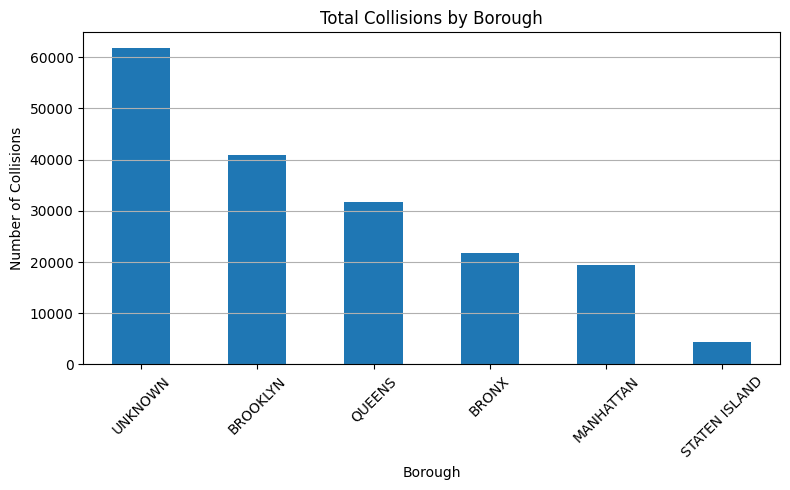

In [19]:
# Count of collisions per borough
borough_counts = df['BOROUGH'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
borough_counts.plot(kind='bar')
plt.title('Total Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

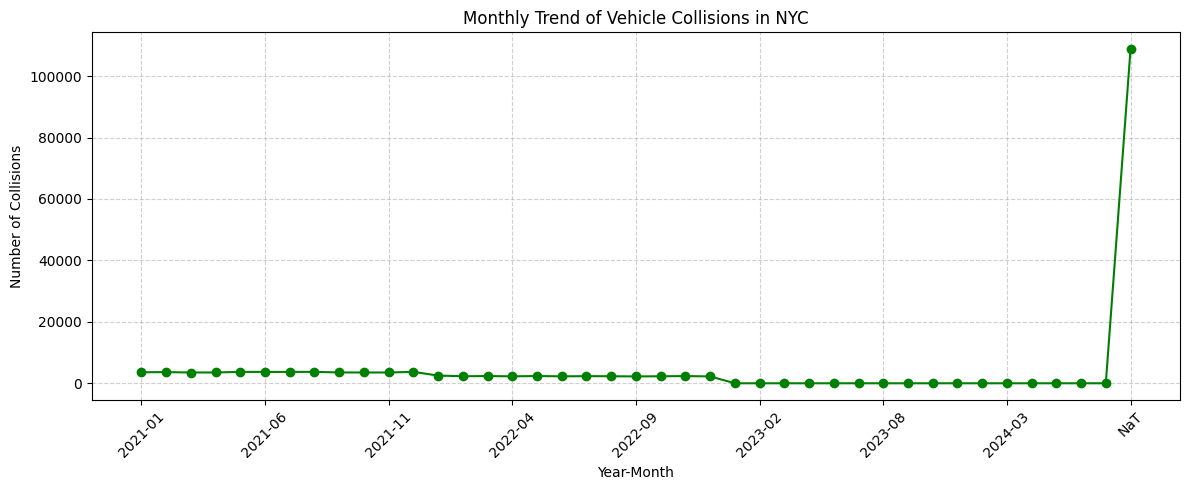

In [20]:
# Extract year-month from crash datetime
df['YEAR_MONTH'] = df['CRASH_DATETIME'].dt.to_period('M').astype(str)

# Group and sort by month
monthly_trend = df['YEAR_MONTH'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
monthly_trend.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Monthly Trend of Vehicle Collisions in NYC')
plt.xlabel('Year-Month')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

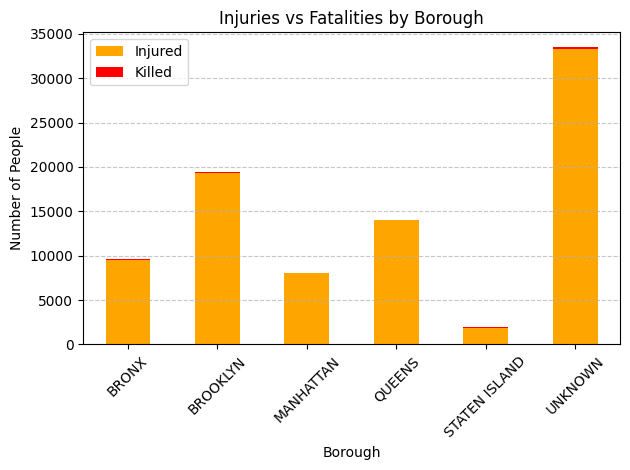

In [21]:
# Sum of injuries and fatalities per borough
borough_stats = df.groupby('BOROUGH')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()

# Plot
plt.figure(figsize=(10, 6))
borough_stats.plot(kind='bar', stacked=True, color=['orange', 'red'])
plt.title('Injuries vs Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['Injured', 'Killed'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
# Filter out rows with valid lat/lon
map_df = df[['LATITUDE', 'LONGITUDE']].dropna()

In [25]:
df['VEHICLE TYPE CODE 1'].value_counts().head(10)

,count
VEHICLE TYPE CODE 1,
Sedan,85122
Station Wagon/Sport Utility Vehicle,62844
Taxi,4550
Pick-up Truck,3697
Box Truck,3078
Bus,2985
Bike,2575
E-Bike,1541
Motorcycle,1481


In [26]:
dangerous_streets = df.groupby('ON STREET NAME')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()
dangerous_streets.sort_values(by='NUMBER OF PERSONS INJURED', ascending=False).head(10)

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
ON STREET NAME,,
BELT PARKWAY,1634.0,12
LONG ISLAND EXPRESSWAY,789.0,5
BROOKLYN QUEENS EXPRESSWAY,759.0,3
BROADWAY,723.0,1
ATLANTIC AVENUE,686.0,7
GRAND CENTRAL PKWY,673.0,6
FDR DRIVE,658.0,6
MAJOR DEEGAN EXPRESSWAY,629.0,8
CROSS ISLAND PARKWAY,616.0,4


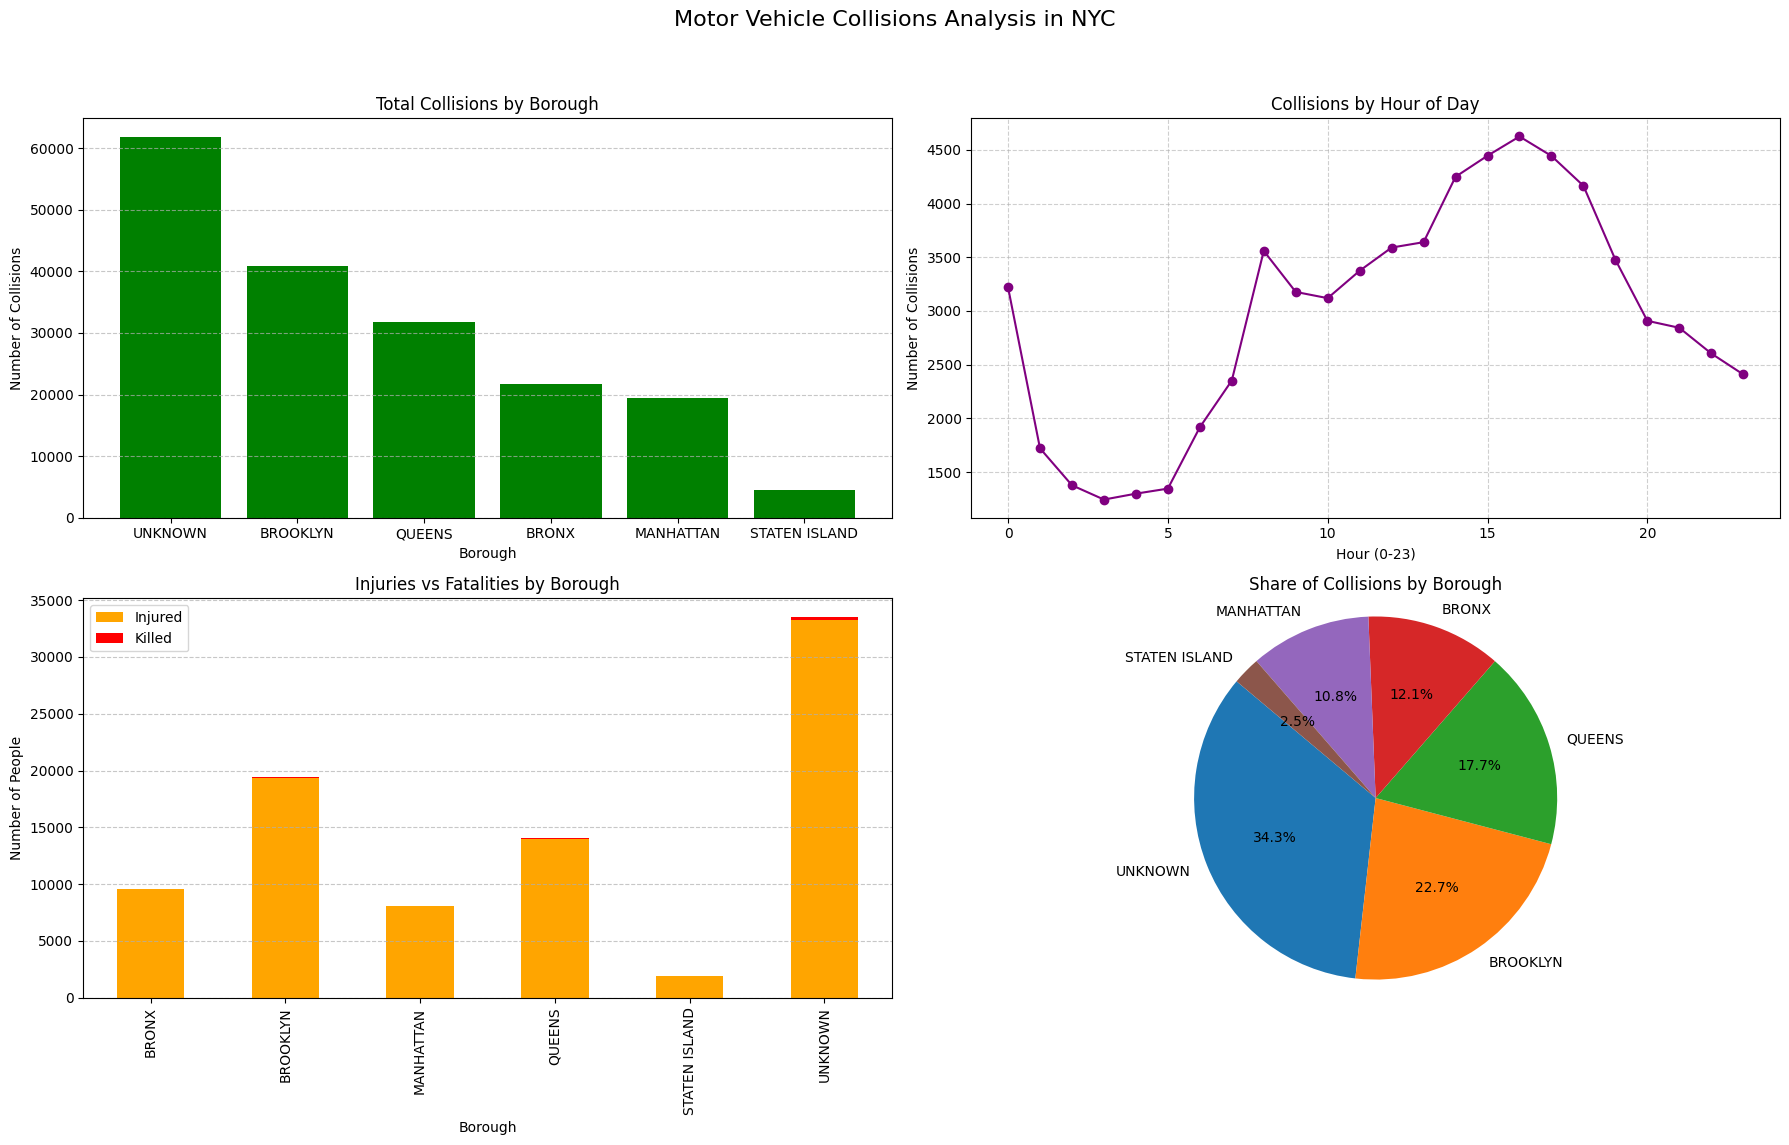

In [31]:
# --- Data prep ---

# Borough counts for pie and bar
borough_counts = df['BOROUGH'].value_counts()

# Hour of crash
df['HOUR'] = df['CRASH_DATETIME'].dt.hour
hourly_trend = df['HOUR'].value_counts().sort_index()

# Injuries and fatalities by borough
borough_stats = df.groupby('BOROUGH')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()

# --- Plot setup ---
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Motor Vehicle Collisions Analysis in NYC', fontsize=16)

# --- 1. Bar Chart: Total Collisions by Borough ---
axs[0, 0].bar(borough_counts.index, borough_counts.values, color='green')
axs[0, 0].set_title('Total Collisions by Borough')
axs[0, 0].set_xlabel('Borough')
axs[0, 0].set_ylabel('Number of Collisions')
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# --- 2. Line Chart: Collisions by Hour of Day (New) ---
axs[0, 1].plot(hourly_trend.index, hourly_trend.values, marker='o', linestyle='-', color='purple')
axs[0, 1].set_title('Collisions by Hour of Day')
axs[0, 1].set_xlabel('Hour (0-23)')
axs[0, 1].set_ylabel('Number of Collisions')
axs[0, 1].grid(True, linestyle='--', alpha=0.6)

# --- 3. Stacked Bar Chart: Injuries vs Fatalities by Borough ---
borough_stats.plot(kind='bar', stacked=True, color=['orange', 'red'], ax=axs[1, 0])
axs[1, 0].set_title('Injuries vs Fatalities by Borough')
axs[1, 0].set_xlabel('Borough')
axs[1, 0].set_ylabel('Number of People')
axs[1, 0].legend(['Injured', 'Killed'])
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# --- 4. Pie Chart: Borough Share of Collisions ---
axs[1, 1].pie(borough_counts.values, labels=borough_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Share of Collisions by Borough')
axs[1, 1].axis('equal')  # Equal aspect ratio for perfect circle

# --- Final layout ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
# Extract hour from datetime
df['HOUR'] = df['CRASH_DATETIME'].dt.hour

# Group by hour and sum pedestrian injuries
pedestrian_injuries = df.groupby('HOUR')['NUMBER OF PEDESTRIANS INJURED'].sum().reset_index()

pedestrian_injuries

,HOUR,NUMBER OF PEDESTRIANS INJURED
0,0.0,166
1,1.0,56
2,2.0,43
3,3.0,48
4,4.0,47
5,5.0,59
6,6.0,110
7,7.0,166
8,8.0,272
9,9.0,225


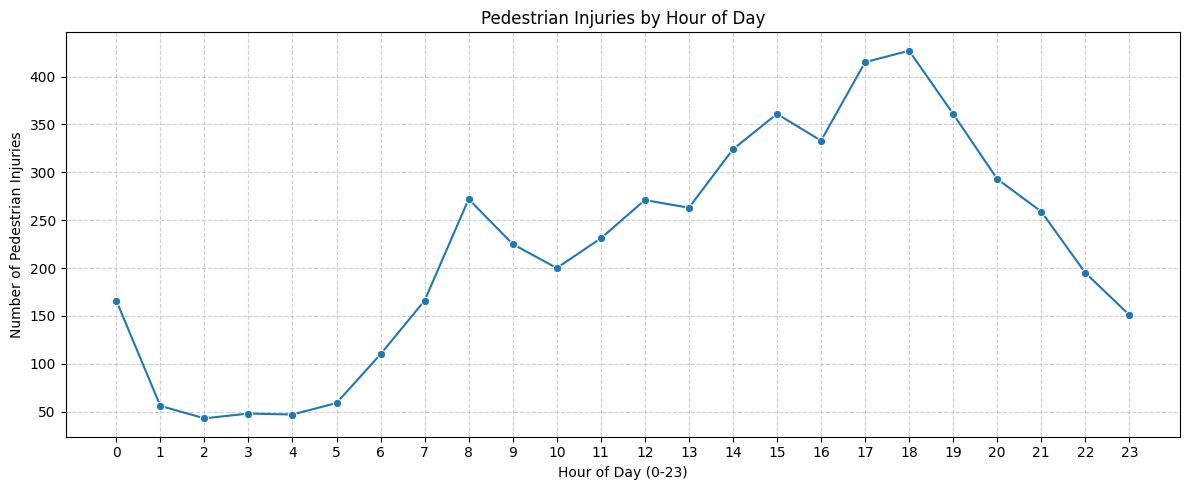

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.lineplot(data=pedestrian_injuries, x='HOUR', y='NUMBER OF PEDESTRIANS INJURED', marker='o')
plt.title('Pedestrian Injuries by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Pedestrian Injuries')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [36]:
# Group by vehicle type and compute total injuries and fatalities
vehicle_severity = df.groupby('VEHICLE TYPE CODE 1')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum().reset_index()

# Keep only top 10 vehicle types with most incidents
vehicle_severity['TOTAL'] = vehicle_severity['NUMBER OF PERSONS INJURED'] + vehicle_severity['NUMBER OF PERSONS KILLED']
top_vehicle_severity = vehicle_severity.sort_values('TOTAL', ascending=False).head(10).drop('TOTAL', axis=1)

top_vehicle_severity


,VEHICLE TYPE CODE 1,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
344,Sedan,39553.0,155
353,Station Wagon/Sport Utility Vehicle,29227.0,117
373,Taxi,2970.0,7
37,Bike,2319.0,8
291,Pick-up Truck,1514.0,17
94,E-Bike,1472.0,17
42,Bus,1313.0,14
238,Motorcycle,1140.0,52
96,E-Scooter,831.0,2
38,Box Truck,796.0,13


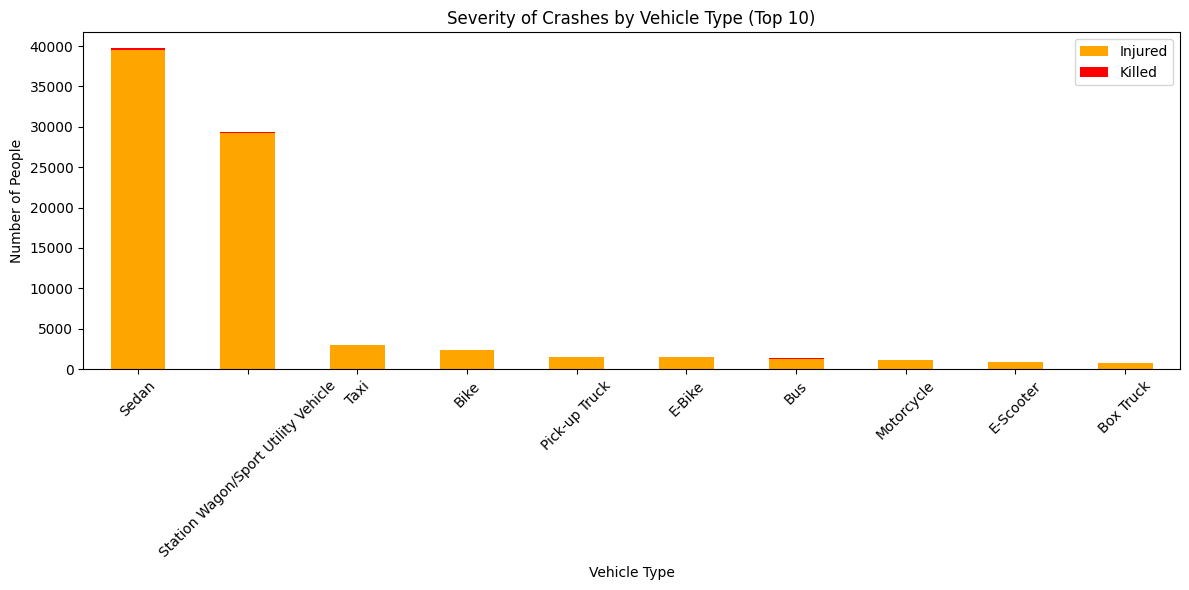

In [37]:
top_vehicle_severity.set_index('VEHICLE TYPE CODE 1').plot(kind='bar', stacked=True, figsize=(12, 6), color=['orange', 'red'])
plt.title('Severity of Crashes by Vehicle Type (Top 10)')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of People')
plt.legend(['Injured', 'Killed'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
# Filter out 'Unspecified' values from contributing factor
filtered_df = df[df['CONTRIBUTING FACTOR VEHICLE 1'].str.upper() != 'UNSPECIFIED']

# Group by borough and contributing factor, count collisions
borough_factors = filtered_df.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='COUNT')

# Get top 5 factors for each borough
top_factors_per_borough = borough_factors.sort_values(['BOROUGH', 'COUNT'], ascending=[True, False])
top_factors_per_borough = top_factors_per_borough.groupby('BOROUGH').head(5)

top_factors_per_borough

,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,COUNT
7,BRONX,Driver Inattention/Distraction,4384
13,BRONX,Failure to Yield Right-of-Way,1194
46,BRONX,Unsafe Speed,930
25,BRONX,Other Vehicular,874
29,BRONX,Passing Too Closely,842
58,BROOKLYN,Driver Inattention/Distraction,9655
64,BROOKLYN,Failure to Yield Right-of-Way,2693
81,BROOKLYN,Passing Too Closely,1629
82,BROOKLYN,Passing or Lane Usage Improper,1531
67,BROOKLYN,Following Too Closely,1499


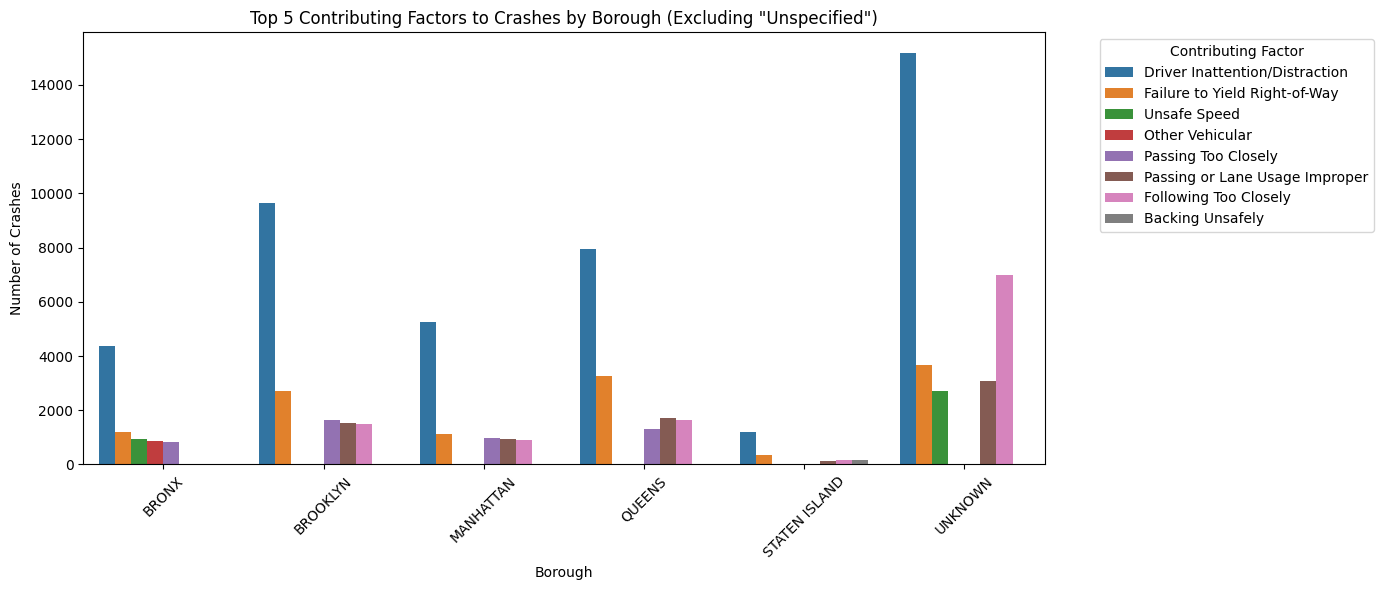

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_factors_per_borough,
    x='BOROUGH',
    y='COUNT',
    hue='CONTRIBUTING FACTOR VEHICLE 1'
)

plt.title('Top 5 Contributing Factors to Crashes by Borough (Excluding "Unspecified")')
plt.ylabel('Number of Crashes')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.legend(title='Contributing Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [40]:
# Define time ranges: day (6 AM–6 PM), night (else)
df['TIME_OF_DAY'] = df['HOUR'].apply(lambda h: 'Day' if 6 <= h < 18 else 'Night')

# Group by time of day and compute total injuries and fatalities
day_night_severity = df.groupby('TIME_OF_DAY')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum().reset_index()

day_night_severity

,TIME_OF_DAY,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Day,18810.0,76
1,Night,67281.0,392


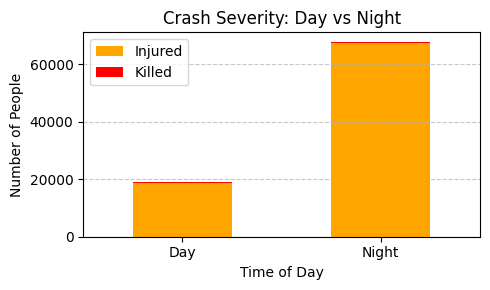

In [43]:
day_night_severity.set_index('TIME_OF_DAY').plot(kind='bar', stacked=True, figsize=(5,3), color=['orange', 'red'])
plt.title('Crash Severity: Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of People')
plt.legend(['Injured', 'Killed'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()